In [12]:
import torch
import matplotlib.pyplot as plt

In [13]:
def smooth_the_data(ax, x, y, smoothing_factor=100, color='blue', label=None, linestyle='-', showstd=True):
    y = torch.tensor(y, dtype=torch.float)
    segments = y.unfold(0, size=smoothing_factor, step=1)

    mid = segments.mean(dim=-1)
    #mx = segments.topk(smoothing_factor//5, dim=-1).values.mean()
    #mn = segments.topk(smoothing_factor//5, largest=False, dim=-1).values.mean()
    std = segments.std(dim=-1)/2

    #plt.plot(epochs, reward, color=color, alpha=0.2)
    x = x[:-smoothing_factor+1]

    ax.plot(x, mid, color=color, label=label, linestyle=linestyle)

    if showstd:
        ax.fill_between(x=x, y1=mid+std, y2=mid-std, color=color, alpha=0.2)
    #plt.fill_between(x=x, y1=mx, y2=mn, color=color, alpha=0.2)


def plot_multiple(dir,seed=0, smoothing_factor=100, title=''):
    fig,axes = plt.subplots(ncols=2)
    fig.set_figheight(11)
    fig.set_figwidth(44)

    i=0
    for n in [10,20,40]:
        data = torch.load(f'../logs/{dir}{n}N_{seed}.pt')
        r = data['rews']; l = data['lens']

        step = [0]
        for s in l:
            step.append(step[-1] + s)
        step = step[1:]

        smooth_the_data(axes[0], step, r, smoothing_factor=smoothing_factor, label=f'{n} nodes', color=f'C{i}')
        axes[0].set_title("Reward", size=40)

        smooth_the_data(axes[1], step, l, smoothing_factor=smoothing_factor, label=f'{n} nodes', color=f'C{i}')
        axes[1].set_title("Episode Length", size=40)

        i += 1

    axes[0].legend(loc='lower right', fontsize=35)
    axes[1].legend(loc='lower right', fontsize=35)
    fig.suptitle(title, size=55)

    axes[0].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)
    plt.show()

def plot_episode(n,seed=0, smoothing_factor=100, dir=''):
    data = torch.load(f'../logs/{dir}{n}N_{seed}.pt')
    r = data['rews']; l = data['lens']; 

    if 'steps' in data:
        step = data['steps']
    else: 
        step = [0]
        for s in l:
            step.append(step[-1] + s)
        step = step[1:]

    fig,axes = plt.subplots(ncols=2)
    fig.set_figheight(7)
    fig.set_figwidth(20)

    smooth_the_data(axes[0], step, r, smoothing_factor=smoothing_factor)
    axes[0].set_title("Reward")

    smooth_the_data(axes[1], step, l, color='red', smoothing_factor=smoothing_factor)
    axes[1].set_title("Episode Length")

    plt.show()

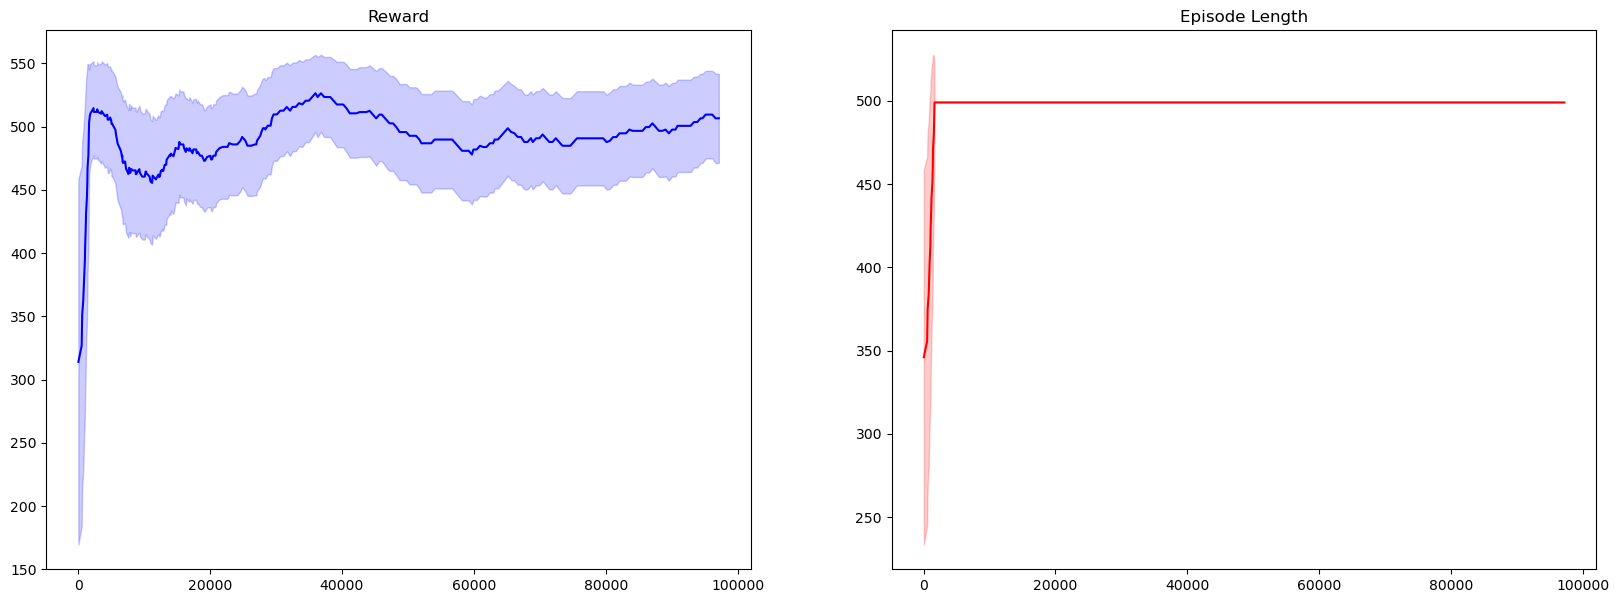

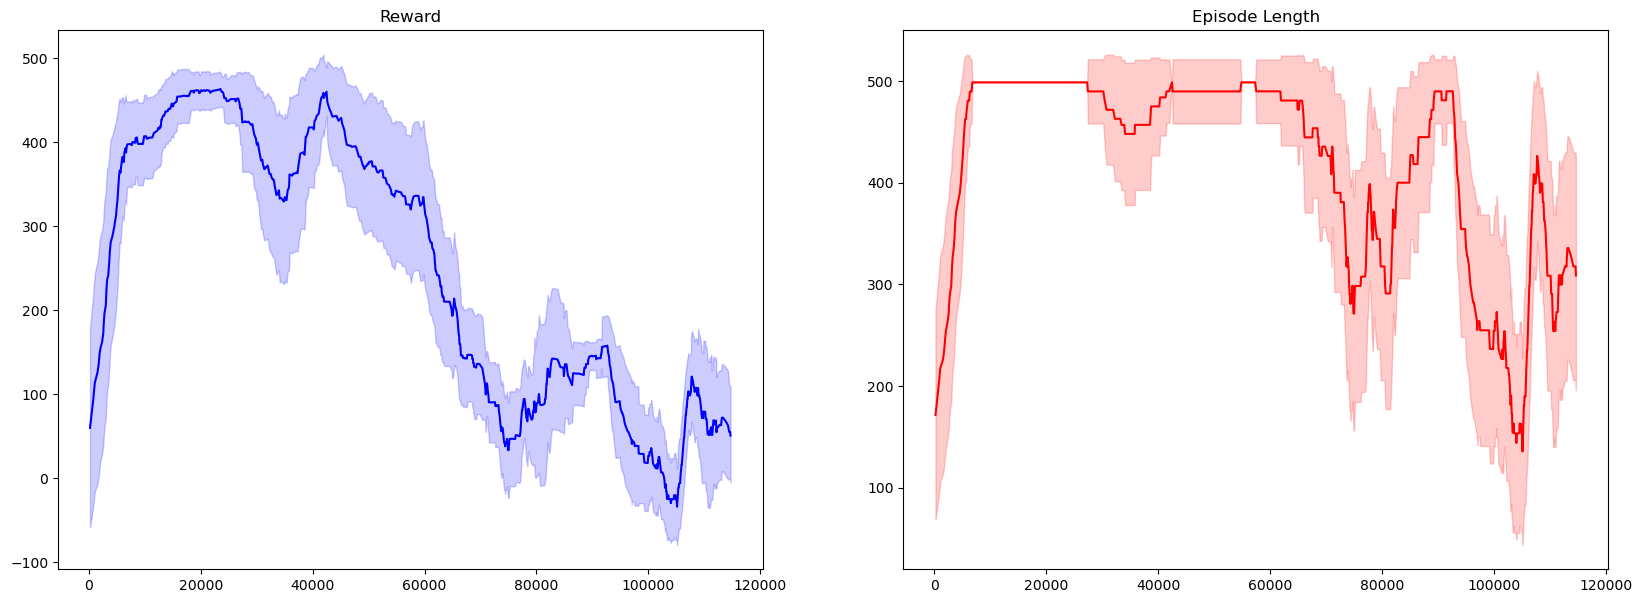

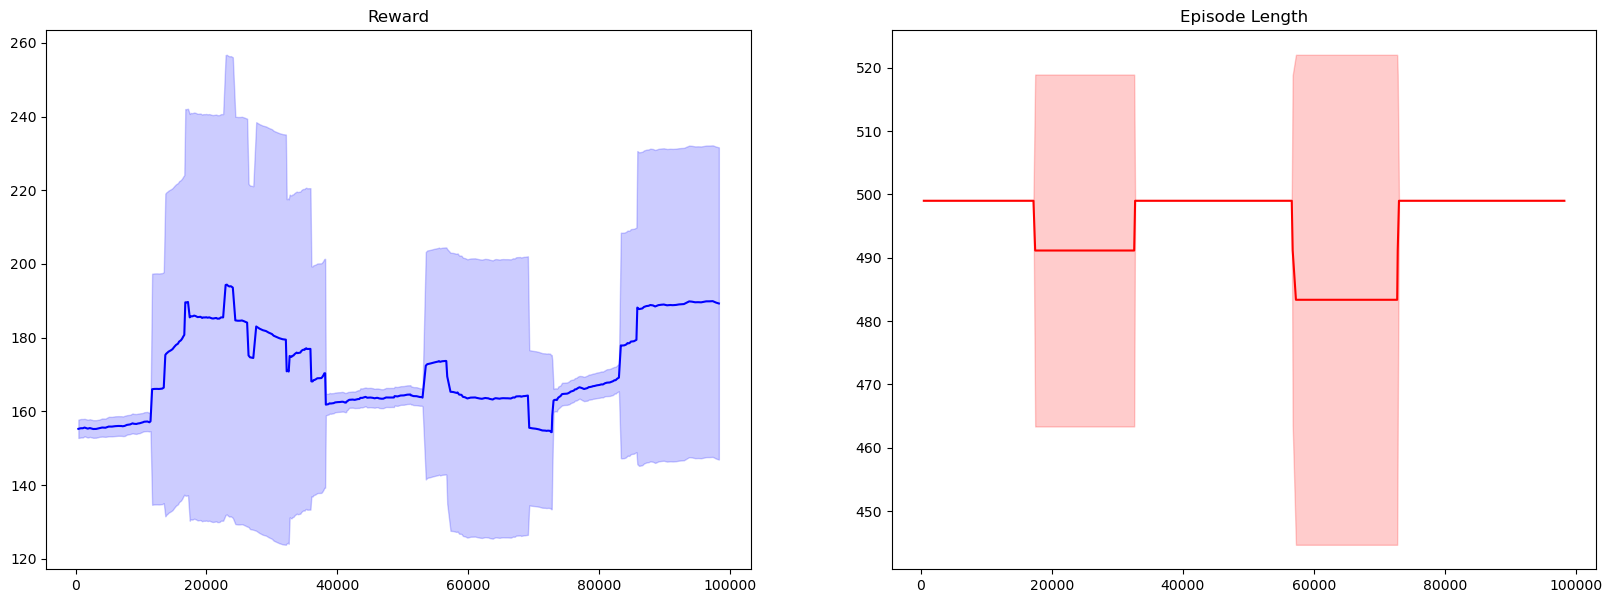

In [25]:
plot_episode(10, dir='doorman_lr0001_N1_gamma1/dqn_', smoothing_factor=50)
plot_episode(20, dir='doorman_lr0001_N1_gamma1/dqn_', smoothing_factor=50)
plot_episode(40, dir='doorman_lr0001_N1_gamma1/dqn_', smoothing_factor=50)

In [22]:
plot_episode(10, dir='dqn_', smoothing_factor=100)
plot_episode(20, dir='dqn_', smoothing_factor=100)
plot_episode(40, dir='dqn_', smoothing_factor=100)

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [ ]:
plot_episode(10, dir='stablebaseline_default_sgd/')
plot_episode(20, dir='stablebaseline_default_sgd/')
plot_episode(40, dir='stablebaseline_default_sgd/')

FileNotFoundError: [Errno 2] No such file or directory: '../logs/stablebaseline_default_sgd/10N_0.pt'

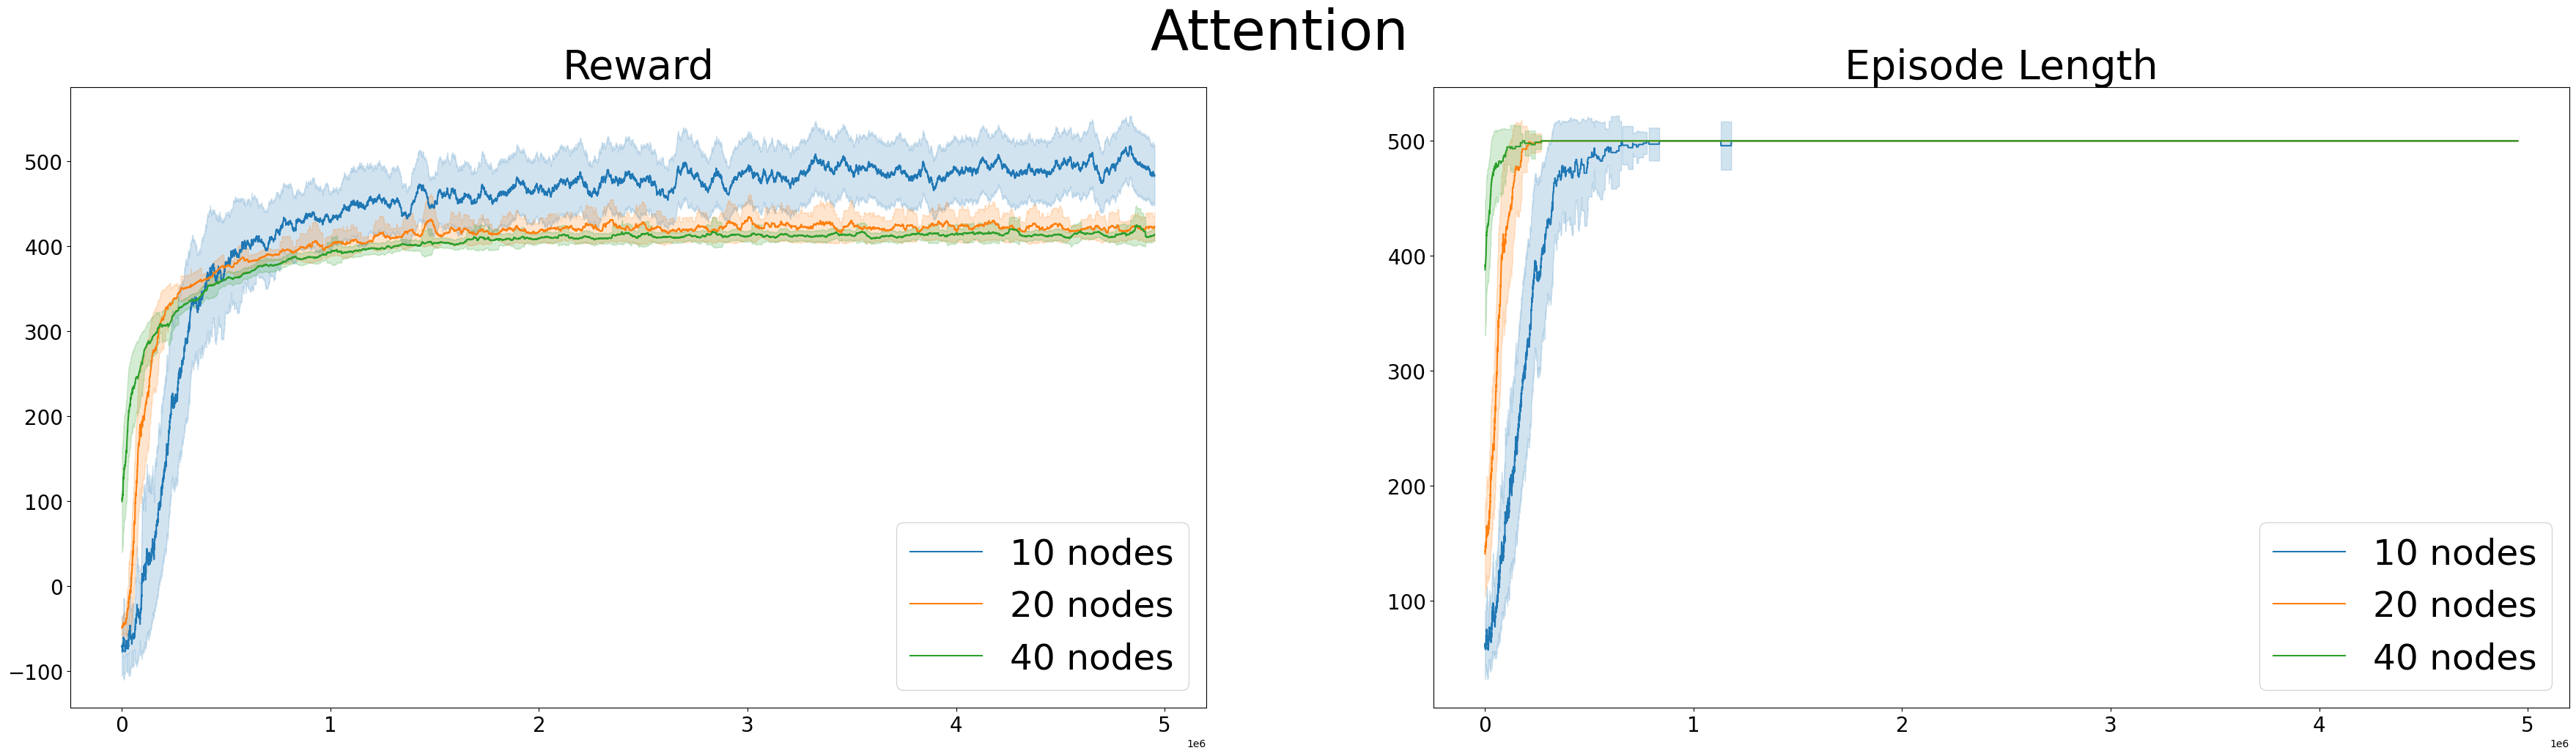

In [ ]:
plot_multiple('stablebaseline_default_sgd/', title='Attention')

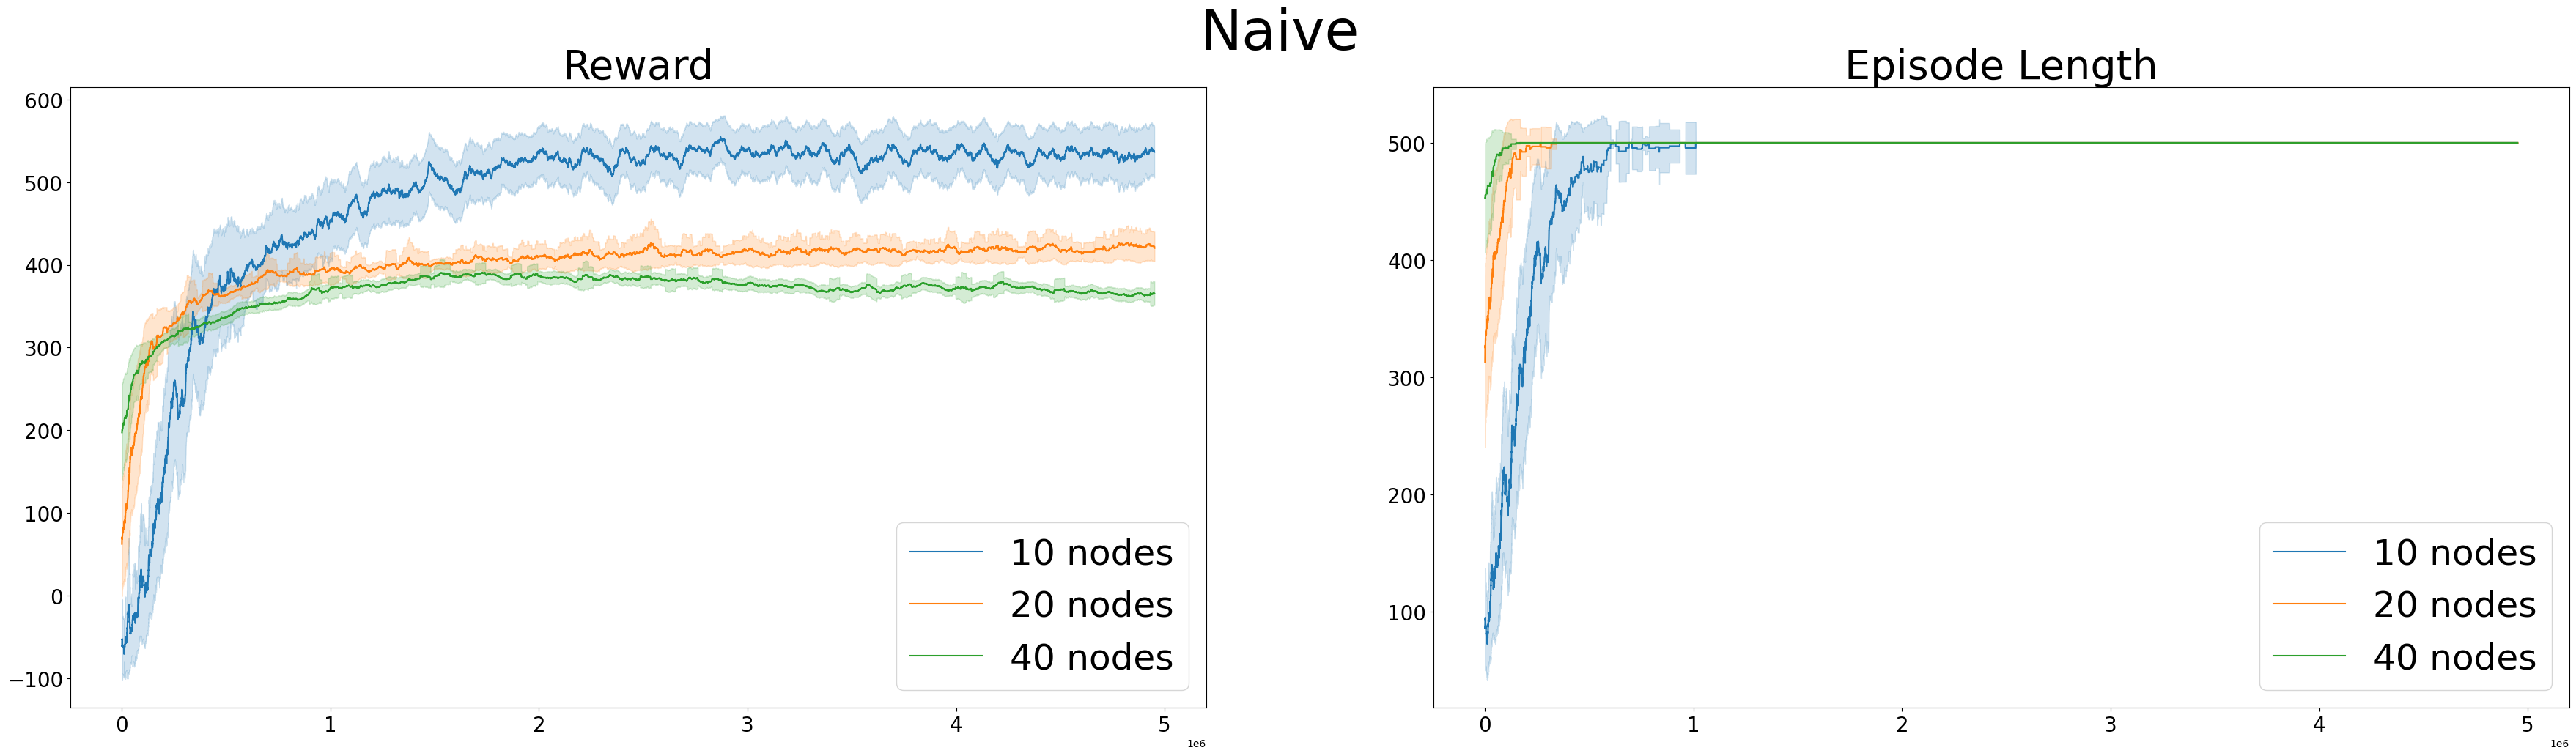

In [ ]:
plot_multiple('stablebaseline_default_naive_sgd/', title='Naive')